In [1]:
get_ipython().system('pip install db-dtypes')
get_ipython().system('pip install plotly')

In [2]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import skew

In [4]:
import numpy as np
from numpy import isnan
from matplotlib import pyplot

In [5]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px

In [6]:
import pandas as pd

In [7]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [8]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [9]:
query_job = bigquery_client.query(query)
unemploy = query_job.to_dataframe()
unemploy.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [10]:
wage = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [11]:
query_wage = bigquery_client.query(wage)
wages = query_wage.to_dataframe()
wages.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [12]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uu_id         525 non-null    object 
 1   countyfips    525 non-null    Int64  
 2   tract         525 non-null    Int64  
 3   tract_name    525 non-null    object 
 4   average_wage  525 non-null    float64
dtypes: Int64(2), float64(1), object(2)
memory usage: 21.7+ KB


In [13]:
unemploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   16833 non-null  object
 1   timeperiod              16833 non-null  Int64 
 2   week_number             16833 non-null  Int64 
 3   countyfips              16833 non-null  Int64 
 4   tract                   16833 non-null  Int64 
 5   tract_name              16833 non-null  object
 6   total_claims            16833 non-null  Int64 
 7   edu_8th_or_less         13748 non-null  Int64 
 8   edu_grades_9_11         5942 non-null   Int64 
 9   edu_hs_grad_equiv       6036 non-null   Int64 
 10  edu_post_hs             3246 non-null   Int64 
 11  edu_unknown             12031 non-null  Int64 
 12  top_category_employer1  16833 non-null  object
 13  top_category_employer2  16833 non-null  object
 14  top_category_employer3  16833 non-null  object
 15  ge

In [14]:
unemploy.isnull().sum()

uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
total_claims                  0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64

In [15]:
unemploy=unemploy.sort_values('week_number', ascending=True)
unemploy.reset_index(inplace=True)
unemploy

,index,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,10697,9ee08e65a6fc00045b2c609903e65603,20220101,1,18089,42901,"Census Tract 429.01, Lake County, Indiana",16,0,<NA>,...,<NA>,<NA>,0,0,0,0,<NA>,0,0,<NA>
1,1157,184e8a1febbf737c9865b40ac43d92ee,20220101,1,18003,10304,"Census Tract 103.04, Allen County, Indiana",12,0,<NA>,...,<NA>,<NA>,0,0,<NA>,<NA>,0,0,0,<NA>
2,4713,74c5fdc6aac736fa7cf9b5d45c501a03,20220101,1,18035,2000,"Census Tract 20, Delaware County, Indiana",28,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,23
3,11998,370a5fb730297d91eb3443d50582515e,20220101,1,18141,10700,"Census Tract 107, St. Joseph County, Indiana",17,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,0,<NA>
4,11994,f63ddd4e3eb78163c5b06897f160db5f,20220101,1,18141,10200,"Census Tract 102, St. Joseph County, Indiana",13,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,4836,a993d47c7143bed2a187b0cac7d17983,20220910,37,18097,340500,"Census Tract 3405, Marion County, Indiana",21,0,<NA>,...,<NA>,<NA>,0,0,0,17,<NA>,0,<NA>,<NA>
16829,6989,592f2bae77a77f0721533ce7f3926d64,20220910,37,18089,12800,"Census Tract 128, Lake County, Indiana",11,0,0,...,<NA>,<NA>,0,0,0,11,0,0,0,0
16830,13451,ce8b2c0e11c538921c39c06b298d2393,20220910,37,18043,70901,"Census Tract 709.01, Floyd County, Indiana",10,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,<NA>
16831,13480,4368ac6502dd50bc209781d0d0f660f4,20220910,37,18151,971300,"Census Tract 9713, Steuben County, Indiana",37,0,<NA>,...,<NA>,<NA>,0,0,0,0,<NA>,0,<NA>,<NA>


<AxesSubplot: >

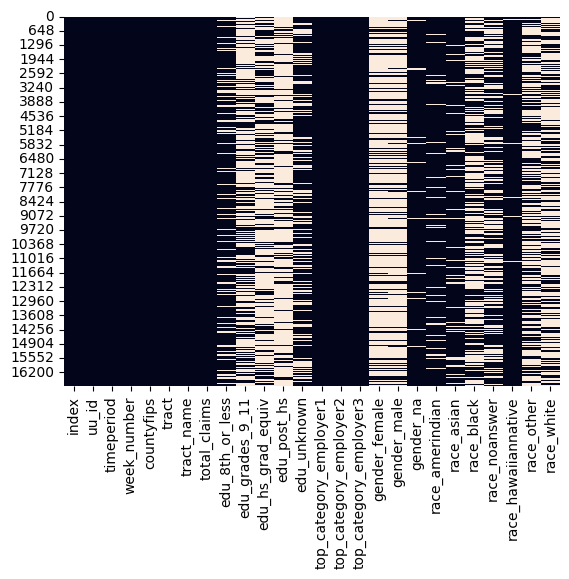

In [16]:
sns.heatmap(unemploy.isnull(),cbar=False)

In [17]:
miss=unemploy.isnull()
total=unemploy.count()
total

index                     16833
uu_id                     16833
timeperiod                16833
week_number               16833
countyfips                16833
tract                     16833
tract_name                16833
total_claims              16833
edu_8th_or_less           13748
edu_grades_9_11            5942
edu_hs_grad_equiv          6036
edu_post_hs                3246
edu_unknown               12031
top_category_employer1    16833
top_category_employer2    16833
top_category_employer3    16833
gender_female              3835
gender_male                3931
gender_na                 15868
race_amerindian           15285
race_asian                14939
race_black                 7124
race_noanswer             10089
race_hawaiiannative       16426
race_other                 8075
race_white                 6392
dtype: int64

In [18]:
miss.sum()

index                         0
uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
total_claims                  0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64

In [19]:
miss.sum()/len(unemploy)

index                     0.000000
uu_id                     0.000000
timeperiod                0.000000
week_number               0.000000
countyfips                0.000000
tract                     0.000000
tract_name                0.000000
total_claims              0.000000
edu_8th_or_less           0.183271
edu_grades_9_11           0.647003
edu_hs_grad_equiv         0.641419
edu_post_hs               0.807164
edu_unknown               0.285273
top_category_employer1    0.000000
top_category_employer2    0.000000
top_category_employer3    0.000000
gender_female             0.772174
gender_male               0.766471
gender_na                 0.057328
race_amerindian           0.091962
race_asian                0.112517
race_black                0.576784
race_noanswer             0.400642
race_hawaiiannative       0.024179
race_other                0.520288
race_white                0.620270
dtype: float64

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/3923839871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  map_1 = unemploy.corr(method ='spearman')


<AxesSubplot: >

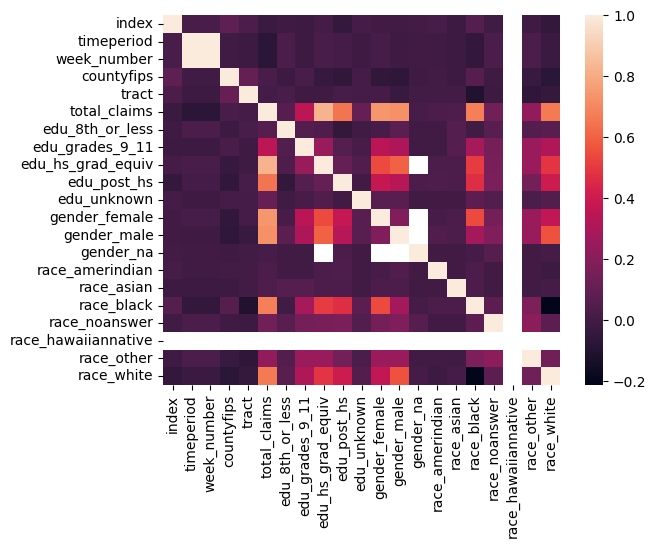

In [20]:
map_1 = unemploy.corr(method ='spearman')
sns.heatmap(map_1)

In [21]:
unemploy["race_hawaiiannative"].unique()

<IntegerArray>
[0, <NA>]
Length: 2, dtype: Int64

In [22]:
df1=unemploy.copy()
df1=df1.drop(columns="race_hawaiiannative")

In [23]:
df=unemploy[['top_category_employer1',"top_category_employer2","top_category_employer3",'uu_id',"tract_name","timeperiod","tract","countyfips"]]

In [24]:
df

,top_category_employer1,top_category_employer2,top_category_employer3,uu_id,tract_name,timeperiod,tract,countyfips
0,23,72,99,9ee08e65a6fc00045b2c609903e65603,"Census Tract 429.01, Lake County, Indiana",20220101,42901,18089
1,56,23,52,184e8a1febbf737c9865b40ac43d92ee,"Census Tract 103.04, Allen County, Indiana",20220101,10304,18003
2,23,56,72,74c5fdc6aac736fa7cf9b5d45c501a03,"Census Tract 20, Delaware County, Indiana",20220101,2000,18035
3,31-33,81,62,370a5fb730297d91eb3443d50582515e,"Census Tract 107, St. Joseph County, Indiana",20220101,10700,18141
4,31-33,81,62,f63ddd4e3eb78163c5b06897f160db5f,"Census Tract 102, St. Joseph County, Indiana",20220101,10200,18141
...,...,...,...,...,...,...,...,...
16828,44-45,56,48-49,a993d47c7143bed2a187b0cac7d17983,"Census Tract 3405, Marion County, Indiana",20220910,340500,18097
16829,62,61,71,592f2bae77a77f0721533ce7f3926d64,"Census Tract 128, Lake County, Indiana",20220910,12800,18089
16830,56,31-33,72,ce8b2c0e11c538921c39c06b298d2393,"Census Tract 709.01, Floyd County, Indiana",20220910,70901,18043
16831,48-49,31-33,44-45,4368ac6502dd50bc209781d0d0f660f4,"Census Tract 9713, Steuben County, Indiana",20220910,971300,18151


In [25]:
df1.drop(columns=['top_category_employer1',"top_category_employer2","top_category_employer3",'uu_id',"tract_name","timeperiod","tract","countyfips"],inplace=True)

In [26]:
impute1=KNNImputer()
impute1.fit(df1)
unemploy1=pd.DataFrame(impute1.fit_transform(df1),columns = df1.columns)

In [27]:
unemploy1

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,10697.0,1.0,16.0,0.0,0.0,10.4,13.8,0.0,11.0,17.2,0.0,0.0,0.0,0.0,0.0,0.0,15.2
1,1157.0,1.0,12.0,0.0,2.8,15.8,16.8,0.0,14.6,15.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
2,4713.0,1.0,28.0,0.0,0.0,16.0,13.0,0.0,13.4,15.4,0.0,0.0,0.0,0.0,0.0,0.0,23.0
3,11998.0,1.0,17.0,0.0,0.0,11.0,13.2,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
4,11994.0,1.0,13.0,0.0,0.0,14.8,11.2,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,4836.0,37.0,21.0,0.0,10.8,15.0,14.6,0.0,11.8,11.8,0.0,0.0,0.0,17.0,0.0,0.0,12.8
16829,6989.0,37.0,11.0,0.0,0.0,14.8,13.2,0.0,13.4,12.8,0.0,0.0,0.0,11.0,0.0,0.0,0.0
16830,13451.0,37.0,10.0,0.0,0.0,15.8,17.4,0.0,10.8,14.2,0.0,0.0,0.0,0.0,0.0,0.0,12.2
16831,13480.0,37.0,37.0,0.0,0.0,17.6,24.0,0.0,14.4,21.4,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [28]:
trial=pd.merge(df, unemploy1, left_index=True, right_index=True)

In [29]:
trial.head()

,top_category_employer1,top_category_employer2,top_category_employer3,uu_id,tract_name,timeperiod,tract,countyfips,index,week_number,...,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,23,72,99,9ee08e65a6fc00045b2c609903e65603,"Census Tract 429.01, Lake County, Indiana",20220101,42901,18089,10697.0,1.0,...,0.0,11.0,17.2,0.0,0.0,0.0,0.0,0.0,0.0,15.2
1,56,23,52,184e8a1febbf737c9865b40ac43d92ee,"Census Tract 103.04, Allen County, Indiana",20220101,10304,18003,1157.0,1.0,...,0.0,14.6,15.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
2,23,56,72,74c5fdc6aac736fa7cf9b5d45c501a03,"Census Tract 20, Delaware County, Indiana",20220101,2000,18035,4713.0,1.0,...,0.0,13.4,15.4,0.0,0.0,0.0,0.0,0.0,0.0,23.0
3,31-33,81,62,370a5fb730297d91eb3443d50582515e,"Census Tract 107, St. Joseph County, Indiana",20220101,10700,18141,11998.0,1.0,...,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
4,31-33,81,62,f63ddd4e3eb78163c5b06897f160db5f,"Census Tract 102, St. Joseph County, Indiana",20220101,10200,18141,11994.0,1.0,...,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6


In [30]:
trial.describe()

,timeperiod,tract,countyfips,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
count,16833.0,16833.0,16833.0,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000
mean,20220540.093329,211605.900315,18088.919682,8416.000000,21.329531,22.952712,0.056449,1.345975,15.869483,14.079309,0.131028,14.963381,15.838555,0.005549,0.010052,0.018559,8.683562,0.198883,0.546747,14.602127
std,268.366832,288715.02492,41.019467,4859.412876,11.618554,14.583655,1.012247,4.038637,8.597765,6.220836,1.559206,6.740005,6.813998,0.442958,0.470250,0.563722,12.052668,2.042296,2.663552,8.676789
min,20220101.0,100.0,18001.0,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20220312.0,10100.0,18063.0,4208.000000,11.000000,14.000000,0.000000,0.000000,12.000000,11.200000,0.000000,12.000000,12.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,20220528.0,42801.0,18095.0,8416.000000,22.000000,18.000000,0.000000,0.000000,13.800000,13.200000,0.000000,13.600000,14.200000,0.000000,0.000000,0.000000,4.200000,0.000000,0.000000,13.600000
75%,20220806.0,342600.0,18103.0,12624.000000,32.000000,27.000000,0.000000,0.000000,16.800000,15.800000,0.000000,15.800000,16.800000,0.000000,0.000000,0.000000,13.600000,0.000000,0.000000,17.000000
max,20220910.0,976400.0,18183.0,16832.000000,37.000000,170.000000,41.000000,78.000000,137.000000,154.000000,60.000000,126.000000,139.000000,49.000000,36.000000,41.000000,163.000000,110.000000,74.000000,155.000000


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/3998575015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trial.corr(method="spearman"))


<AxesSubplot: >

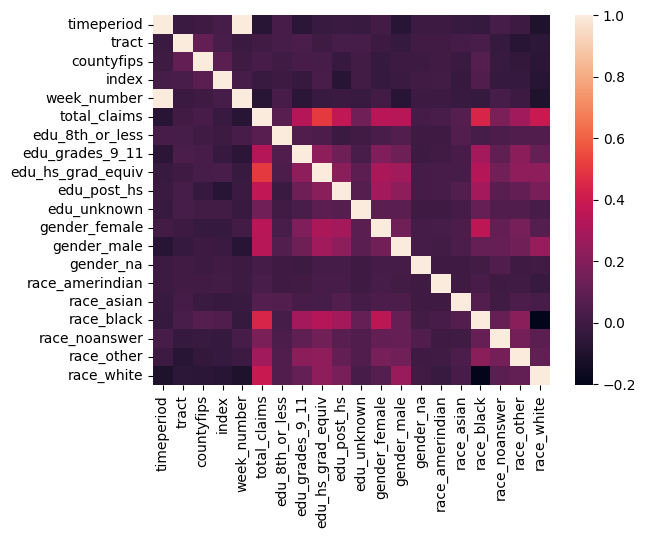

In [31]:
sns.heatmap(trial.corr(method="spearman"))

In [32]:
trial1=trial.copy()

In [33]:
scaler = StandardScaler()
scaled=pd.DataFrame(scaler.fit_transform(unemploy1),columns = unemploy1.columns)

In [34]:
scaled

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,0.469412,-1.749799,-0.476761,-0.055767,-0.333284,-0.636171,-0.044900,-0.084038,-0.588056,0.199807,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,0.068907
1,-1.493846,-1.749799,-0.751049,-0.055767,0.360039,-0.008082,0.437364,-0.084038,-0.053916,-0.123067,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.184651
2,-0.762049,-1.749799,0.346102,-0.055767,-0.333284,0.015181,-0.173504,-0.084038,-0.231962,-0.064363,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,0.967884
3,0.737148,-1.749799,-0.408189,-0.055767,-0.333284,-0.566383,-0.141353,-0.084038,-1.003498,-0.504646,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.461259
4,0.736325,-1.749799,-0.682477,-0.055767,-0.333284,-0.124394,-0.462863,-0.084038,-1.003498,-0.504646,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.461259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,-0.736736,1.348785,-0.133901,-0.055767,2.340964,-0.101132,0.083704,-0.084038,-0.469358,-0.592703,-0.012527,-0.021376,-0.032923,0.690029,-0.097385,-0.205276,-0.207701
16829,-0.293666,1.348785,-0.819621,-0.055767,-0.333284,-0.124394,-0.141353,-0.084038,-0.231962,-0.445942,-0.012527,-0.021376,-0.032923,0.192199,-0.097385,-0.205276,-1.682945
16830,1.036164,1.348785,-0.888193,-0.055767,-0.333284,-0.008082,0.533817,-0.084038,-0.617730,-0.240476,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.276853
16831,1.042132,1.348785,0.963250,-0.055767,-0.333284,0.201281,1.594799,-0.084038,-0.083590,0.816204,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,1.428897


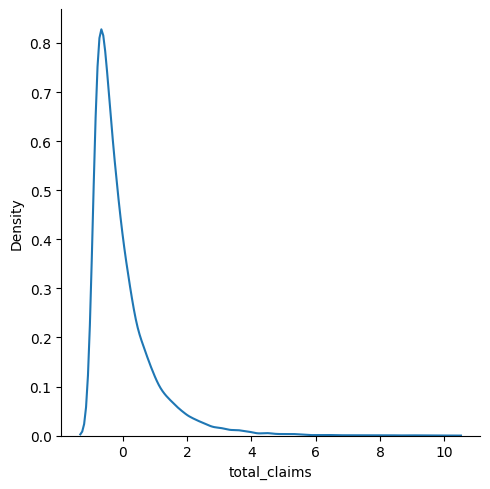

In [35]:
sns.displot(data=scaled,x="total_claims",kind="kde")

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/107298841.py:2: RuntimeWarning: invalid value encountered in sqrt
  sqrt_claim = np.sqrt(claim)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/107298841.py:3: RuntimeWarning: invalid value encountered in log
  log_claim = np.log(claim)


(array([450.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        419.,   0.,   0., 397., 355., 332., 299., 471., 670., 498., 493.,
        455., 433., 320., 203., 133.,  67.,  27.,  15.]),
 array([-5.73136905, -5.46329399, -5.19521894, -4.92714389, -4.65906884,
        -4.39099379, -4.12291873, -3.85484368, -3.58676863, -3.31869358,
        -3.05061853, -2.78254347, -2.51446842, -2.24639337, -1.97831832,
        -1.71024327, -1.44216821, -1.17409316, -0.90601811, -0.63794306,
        -0.369868  , -0.10179295,  0.1662821 ,  0.43435715,  0.7024322 ,
         0.97050726,  1.23858231,  1.50665736,  1.77473241,  2.04280746,
         2.31088252]),
 <BarContainer object of 30 artists>)

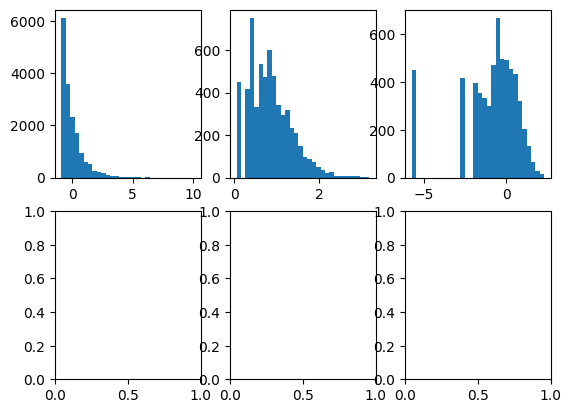

In [36]:
claim = np.array(scaled["total_claims"])
sqrt_claim = np.sqrt(claim)
log_claim = np.log(claim)
f, ((f1, f2, f3), (f4, f5, f6)) = plt.subplots(2, 3)
#f, ((f1, f2), (f4, f5)) = plt.subplots(2, 2)
f1.hist(claim, 30)
f2.hist(sqrt_claim, 30)
f3.hist(log_claim, 30)

In [37]:
stats.probplot(claim, plot=f4)
stats.probplot(sqrt_claim, plot=f5)
stats.probplot(log_claim, plot=f6)
plt.show
stats.shapiro(claim)[1], stats.shapiro(sqrt_claim)[1], stats.shapiro(log_claim)[1]

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0, 1.0, 1.0)

In [38]:
shapiro(sqrt_claim)

ShapiroResult(statistic=nan, pvalue=1.0)

In [39]:
print(skew(sqrt_claim))

nan


In [40]:
shapiro(unemploy1.total_claims)

ShapiroResult(statistic=0.7496511340141296, pvalue=0.0)

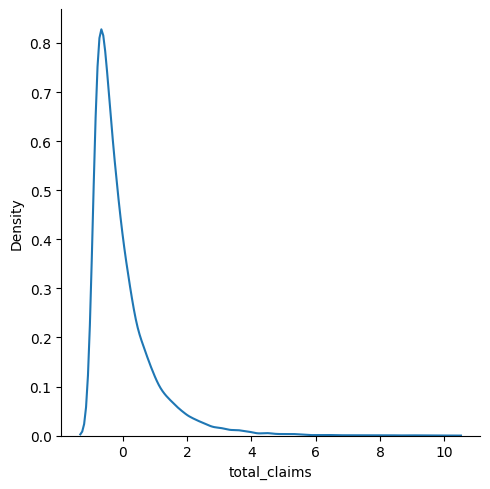

In [41]:
sns.displot(data=scaled,x="total_claims",kind="kde")

In [42]:
f3.hist(log_claim, 30)

(array([450.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        419.,   0.,   0., 397., 355., 332., 299., 471., 670., 498., 493.,
        455., 433., 320., 203., 133.,  67.,  27.,  15.]),
 array([-5.73136905, -5.46329399, -5.19521894, -4.92714389, -4.65906884,
        -4.39099379, -4.12291873, -3.85484368, -3.58676863, -3.31869358,
        -3.05061853, -2.78254347, -2.51446842, -2.24639337, -1.97831832,
        -1.71024327, -1.44216821, -1.17409316, -0.90601811, -0.63794306,
        -0.369868  , -0.10179295,  0.1662821 ,  0.43435715,  0.7024322 ,
         0.97050726,  1.23858231,  1.50665736,  1.77473241,  2.04280746,
         2.31088252]),
 <BarContainer object of 30 artists>)

In [43]:
stats.probplot(scaled["total_claims"],dist="norm",plot=pylab)
pylab.show()

NameError: name 'pylab' is not defined

In [44]:
import pylab

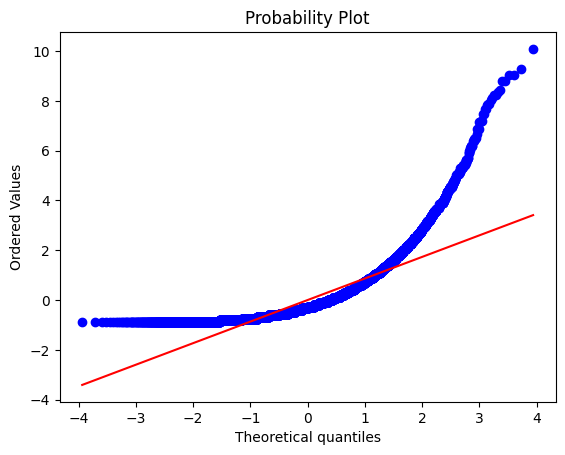

In [45]:
stats.probplot(scaled["total_claims"],dist="norm",plot=pylab)
pylab.show()

<AxesSubplot: xlabel='total_claims'>

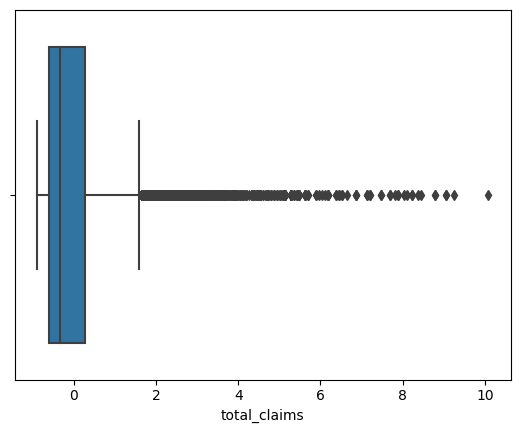

In [46]:
sns.boxplot(x=scaled["total_claims"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/3965302083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled["total_claims"])


<AxesSubplot: xlabel='total_claims', ylabel='Density'>

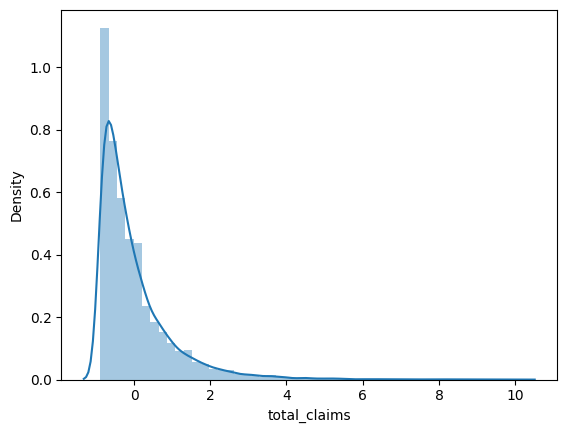

In [47]:
sns.distplot(scaled["total_claims"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/4142042688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled["total_claims"])


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/4142042688.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_claim)


<AxesSubplot: xlabel='total_claims', ylabel='Density'>

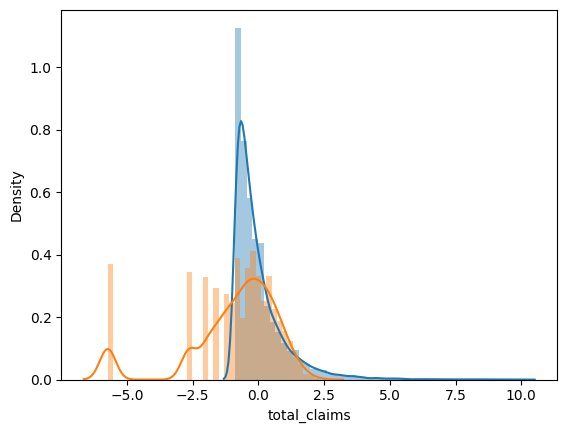

In [48]:
sns.distplot(scaled["total_claims"])
sns.distplot(log_claim)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/2923733619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_claim)


<AxesSubplot: ylabel='Density'>

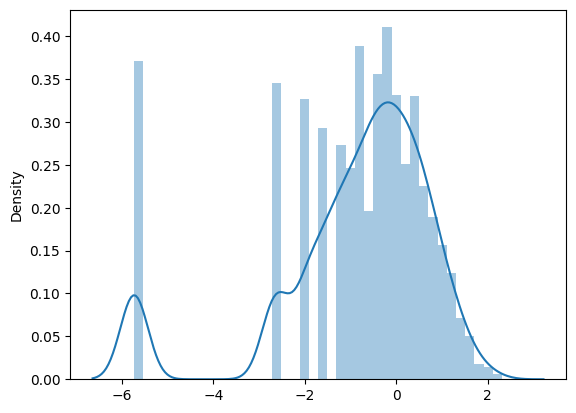

In [49]:
#sns.distplot(scaled["total_claims"])
sns.distplot(log_claim)

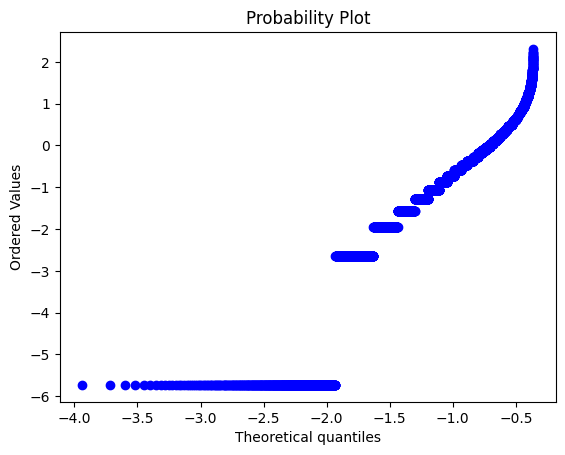

In [50]:
stats.probplot(log_claim,dist="norm",plot=pylab)
pylab.show()

<AxesSubplot: >

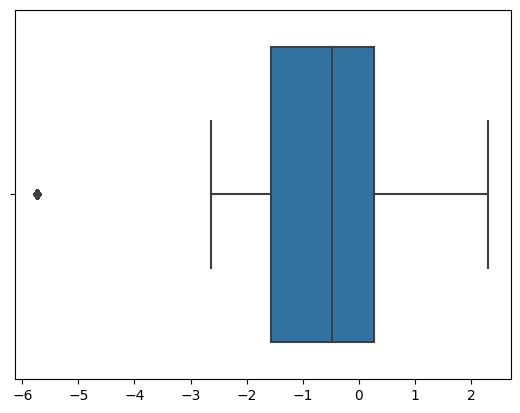

In [51]:
sns.boxplot(x=log_claim)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/3827594330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled)


<AxesSubplot: ylabel='Density'>

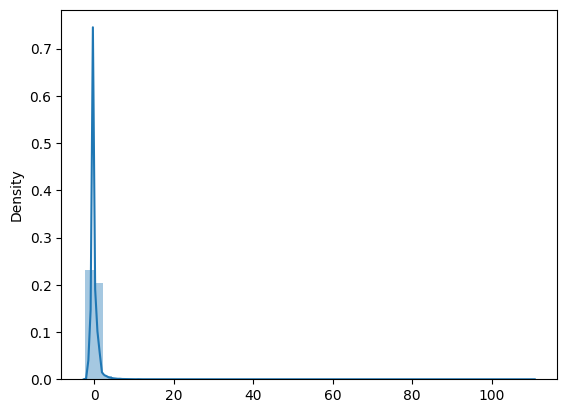

In [52]:
#sns.distplot(scaled["total_claims"])
sns.distplot(scaled)

In [53]:
scaled.plot.hist(subplots=True, legend=True, layout=(8, 2))

ValueError: Layout of 8x2 must be larger than required size 17

<Figure size 640x480 with 0 Axes>

array([[<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>],
       [<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>]], dtype=object)

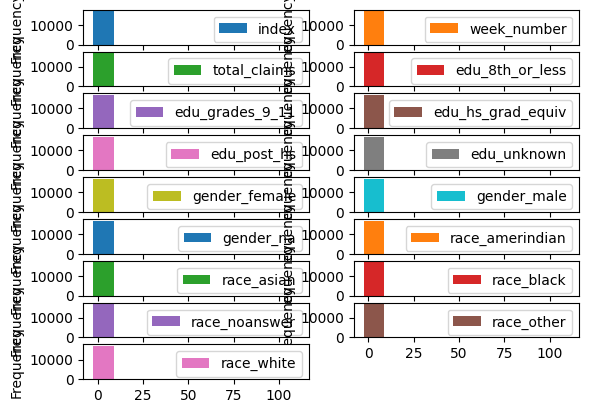

In [54]:
scaled.plot.hist(subplots=True, legend=True, layout=(9, 2))

In [55]:
scale_logs = np.log(scaled)

/opt/homebrew/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/homebrew/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [56]:
scale_log

NameError: name 'scale_log' is not defined

In [57]:
scale_logs

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,-0.756274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.610403,NaN,NaN,NaN,NaN,NaN,NaN,-2.674998
1,NaN,NaN,NaN,NaN,-1.021542,NaN,-0.826989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-1.061021,NaN,NaN,-4.187721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.032643
3,-0.304967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.306084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,NaN,0.299204,NaN,NaN,0.850563,NaN,-2.480472,NaN,NaN,NaN,NaN,NaN,NaN,-0.371022,NaN,NaN,NaN
16829,NaN,0.299204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.649226,NaN,NaN,NaN
16830,0.035526,0.299204,NaN,NaN,NaN,NaN,-0.627702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16831,0.041269,0.299204,-0.037442,NaN,NaN,-1.603052,0.466748,NaN,NaN,-0.203091,NaN,NaN,NaN,NaN,NaN,NaN,0.356903


<AxesSubplot: xlabel='edu_grades_9_11'>

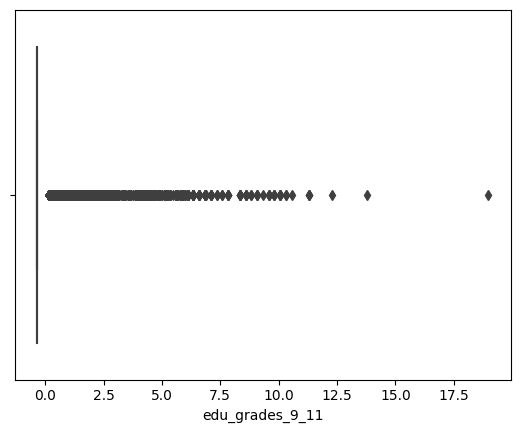

In [58]:
sns.boxplot(x=scaled["edu_grades_9_11"])

<AxesSubplot: xlabel='edu_grades_9_11'>

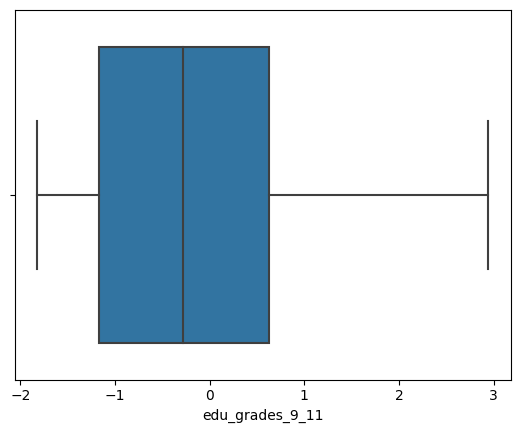

In [59]:
sns.boxplot(x=scale_logs["edu_grades_9_11"])

In [60]:
scale_sqrt=np.sqrt(scaled)

/opt/homebrew/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [61]:
scale_sqrt

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,0.685137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446998,NaN,NaN,NaN,NaN,NaN,NaN,0.262501
1,NaN,NaN,NaN,NaN,0.600033,NaN,0.661335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.588305,NaN,NaN,0.123211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.983811
3,0.858573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.858094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,NaN,1.161372,NaN,NaN,1.530021,NaN,0.289316,NaN,NaN,NaN,NaN,NaN,NaN,0.830680,NaN,NaN,NaN
16829,NaN,1.161372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.438405,NaN,NaN,NaN
16830,1.017922,1.161372,NaN,NaN,NaN,NaN,0.730628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16831,1.020849,1.161372,0.981453,NaN,NaN,0.448644,1.262854,NaN,NaN,0.903440,NaN,NaN,NaN,NaN,NaN,NaN,1.195365


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/2196226873.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_claim)


<AxesSubplot: ylabel='Density'>

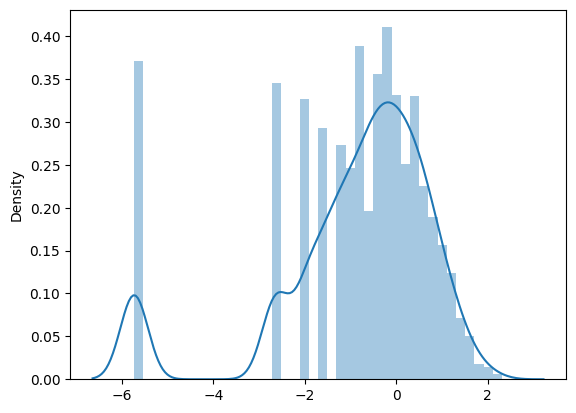

In [62]:
sns.distplot(log_claim)

In [63]:
unemploy_logs = np.log(unemploy1)

/opt/homebrew/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [64]:
unemploy_logs

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,9.277719,0.000000,2.772589,-inf,-inf,2.341806,2.624669,-inf,2.397895,2.844909,-inf,-inf,-inf,-inf,-inf,-inf,2.721295
1,7.053586,0.000000,2.484907,-inf,1.029619,2.760010,2.821379,-inf,2.681022,2.708050,-inf,-inf,-inf,-inf,-inf,-inf,2.564949
2,8.458080,0.000000,3.332205,-inf,-inf,2.772589,2.564949,-inf,2.595255,2.734368,-inf,-inf,-inf,-inf,-inf,-inf,3.135494
3,9.392495,0.000000,2.833213,-inf,-inf,2.397895,2.580217,-inf,2.104134,2.517696,-inf,-inf,-inf,-inf,-inf,-inf,2.360854
4,9.392162,0.000000,2.564949,-inf,-inf,2.694627,2.415914,-inf,2.104134,2.517696,-inf,-inf,-inf,-inf,-inf,-inf,2.360854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,8.483843,3.610918,3.044522,-inf,2.379546,2.708050,2.681022,-inf,2.468100,2.468100,-inf,-inf,-inf,2.833213,-inf,-inf,2.549445
16829,8.852093,3.610918,2.397895,-inf,-inf,2.694627,2.580217,-inf,2.595255,2.549445,-inf,-inf,-inf,2.397895,-inf,-inf,-inf
16830,9.506809,3.610918,2.302585,-inf,-inf,2.760010,2.856470,-inf,2.379546,2.653242,-inf,-inf,-inf,-inf,-inf,-inf,2.501436
16831,9.508962,3.610918,3.610918,-inf,-inf,2.867899,3.178054,-inf,2.667228,3.063391,-inf,-inf,-inf,-inf,-inf,-inf,3.295837


In [65]:
unemp_sqrt=np.sqrt(unemploy1)

In [66]:
unemp_sqrt

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,103.426302,1.000000,4.000000,0.0,0.000000,3.224903,3.714835,0.0,3.316625,4.147288,0.0,0.0,0.0,0.000000,0.0,0.0,3.898718
1,34.014703,1.000000,3.464102,0.0,1.673320,3.974921,4.098780,0.0,3.820995,3.872983,0.0,0.0,0.0,0.000000,0.0,0.0,3.605551
2,68.651293,1.000000,5.291503,0.0,0.000000,4.000000,3.605551,0.0,3.660601,3.924283,0.0,0.0,0.0,0.000000,0.0,0.0,4.795832
3,109.535382,1.000000,4.123106,0.0,0.000000,3.316625,3.633180,0.0,2.863564,3.521363,0.0,0.0,0.0,0.000000,0.0,0.0,3.255764
4,109.517122,1.000000,3.605551,0.0,0.000000,3.847077,3.346640,0.0,2.863564,3.521363,0.0,0.0,0.0,0.000000,0.0,0.0,3.255764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,69.541355,6.082763,4.582576,0.0,3.286335,3.872983,3.820995,0.0,3.435113,3.435113,0.0,0.0,0.0,4.123106,0.0,0.0,3.577709
16829,83.600239,6.082763,3.316625,0.0,0.000000,3.847077,3.633180,0.0,3.660601,3.577709,0.0,0.0,0.0,3.316625,0.0,0.0,0.000000
16830,115.978446,6.082763,3.162278,0.0,0.000000,3.974921,4.171331,0.0,3.286335,3.768289,0.0,0.0,0.0,0.000000,0.0,0.0,3.492850
16831,116.103402,6.082763,6.082763,0.0,0.000000,4.195235,4.898979,0.0,3.794733,4.626013,0.0,0.0,0.0,0.000000,0.0,0.0,5.196152


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/682060999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemp_sqrt)


<AxesSubplot: ylabel='Density'>

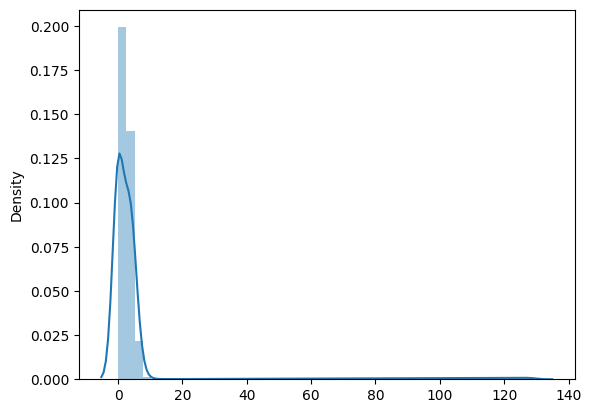

In [67]:
sns.distplot(unemp_sqrt)

In [68]:
sns.distplot(unemp_sqrt[edu_grades_9_11])

NameError: name 'edu_grades_9_11' is not defined

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/2449020309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemp_sqrt["edu_grades_9_11"])


<AxesSubplot: xlabel='edu_grades_9_11', ylabel='Density'>

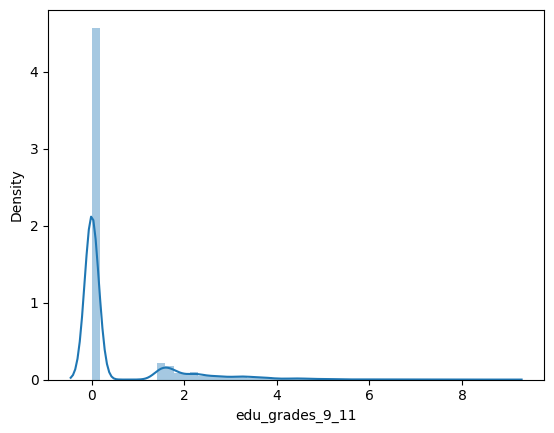

In [69]:
sns.distplot(unemp_sqrt["edu_grades_9_11"])

In [70]:
unemp_cube=np.power((unemploy1),1/3)

In [71]:
unemp_cube

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,22.033695,1.000000,2.519842,0.0,0.000000,2.182786,2.398610,0.0,2.223980,2.581326,0.0,0.0,0.0,0.000000,0.0,0.0,2.477125
1,10.498110,1.000000,2.289428,0.0,1.409460,2.509299,2.561158,0.0,2.444092,2.466212,0.0,0.0,0.0,0.000000,0.0,0.0,2.351335
2,16.766117,1.000000,3.036589,0.0,0.000000,2.519842,2.351335,0.0,2.375208,2.487942,0.0,0.0,0.0,0.000000,0.0,0.0,2.843867
3,22.893013,1.000000,2.571282,0.0,0.000000,2.223980,2.363332,0.0,2.016530,2.314589,0.0,0.0,0.0,0.000000,0.0,0.0,2.196689
4,22.890469,1.000000,2.351335,0.0,0.000000,2.455202,2.237378,0.0,2.016530,2.314589,0.0,0.0,0.0,0.000000,0.0,0.0,2.196689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,16.910720,3.332222,2.758924,0.0,2.210419,2.466212,2.444092,0.0,2.276638,2.276638,0.0,0.0,0.0,2.571282,0.0,0.0,2.339214
16829,19.119286,3.332222,2.223980,0.0,0.000000,2.455202,2.363332,0.0,2.375208,2.339214,0.0,0.0,0.0,2.223980,0.0,0.0,0.000000
16830,23.782172,3.332222,2.154435,0.0,0.000000,2.509299,2.591292,0.0,2.210419,2.421565,0.0,0.0,0.0,0.000000,0.0,0.0,2.302078
16831,23.799251,3.332222,3.332222,0.0,0.000000,2.601183,2.884499,0.0,2.432881,2.776331,0.0,0.0,0.0,0.000000,0.0,0.0,3.000000


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/865909892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemp_cube["edu_grades_9_11"])


<AxesSubplot: xlabel='edu_grades_9_11', ylabel='Density'>

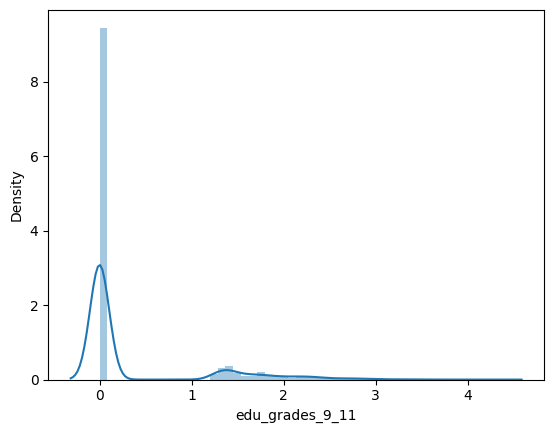

In [72]:
sns.distplot(unemp_cube["edu_grades_9_11"])

In [73]:
unemp_cube=np.power((unemploy1),1/4)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/865909892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemp_cube["edu_grades_9_11"])


<AxesSubplot: xlabel='edu_grades_9_11', ylabel='Density'>

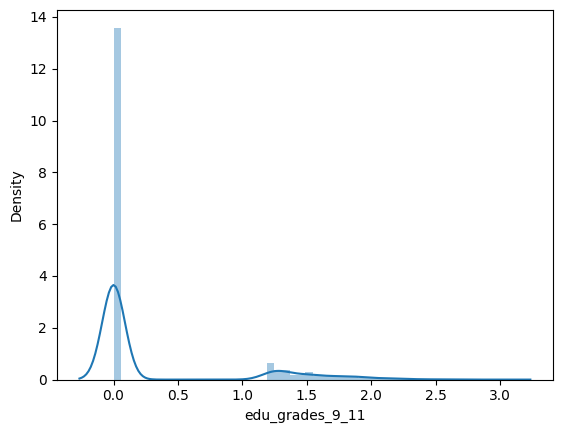

In [74]:
sns.distplot(unemp_cube["edu_grades_9_11"])

In [75]:
unemp_cube=np.power((unemploy1),1/6)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/865909892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemp_cube["edu_grades_9_11"])


<AxesSubplot: xlabel='edu_grades_9_11', ylabel='Density'>

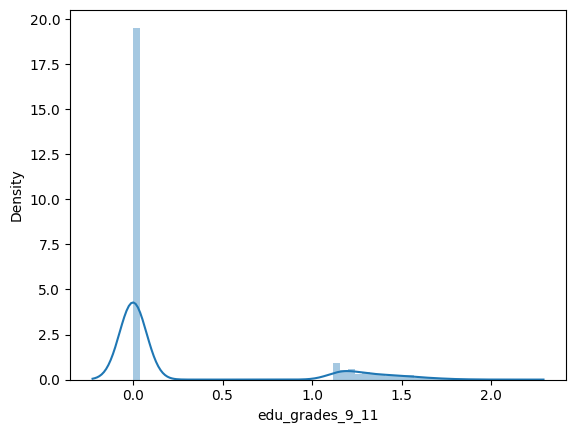

In [76]:
sns.distplot(unemp_cube["edu_grades_9_11"])

In [77]:
unemp_cube=np.power((unemploy1),1/10)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/865909892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemp_cube["edu_grades_9_11"])


<AxesSubplot: xlabel='edu_grades_9_11', ylabel='Density'>

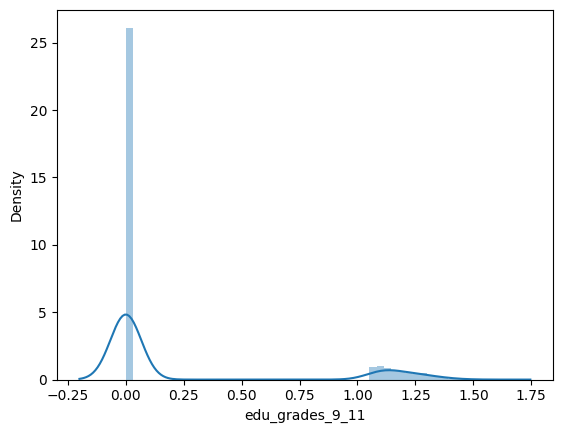

In [78]:
sns.distplot(unemp_cube["edu_grades_9_11"])

In [79]:
unemp_cube=np.power((unemploy1),1/3)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15179/865909892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemp_cube["edu_grades_9_11"])


<AxesSubplot: xlabel='edu_grades_9_11', ylabel='Density'>

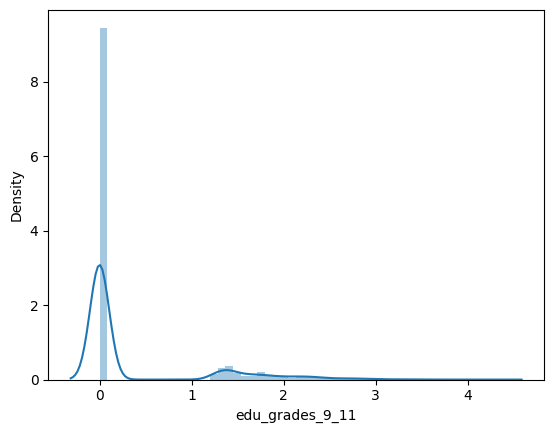

In [80]:
sns.distplot(unemp_cube["edu_grades_9_11"])

In [81]:
shapiro(unemp_cube.total_claims)

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.904344379901886, pvalue=0.0)

In [82]:
from scipy.stats import jarque_bera

In [83]:
statistics,pvalue = jarque_bera(unemploy1.total_claims)

In [84]:
print('statistics=%.3f, p=%.3f\n' %(statisticss, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

NameError: name 'statisticss' is not defined

In [85]:
statistics,pvalue = jarque_bera(unemploy1.total_claims)

In [86]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=116227.757, p=0.000

Probably not Normal


In [87]:
statistics,pvalue = jarque_bera(unemp_sqrt.total_claims)

In [88]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=13953.157, p=0.000

Probably not Normal


In [89]:
statistics,pvalue = jarque_bera(unemp_log.total_claims)

NameError: name 'unemp_log' is not defined

In [90]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=13953.157, p=0.000

Probably not Normal


In [91]:
statistics,pvalue = jarque_bera(unemp_logs.total_claims)

NameError: name 'unemp_logs' is not defined

In [92]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=13953.157, p=0.000

Probably not Normal


In [93]:
statistics,pvalue = jarque_bera(unemp_cube.total_claims)

In [94]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=6848.443, p=0.000

Probably not Normal


In [95]:
statistics,pvalue = jarque_bera(unemp_cube)

In [96]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=2675061.878, p=0.000

Probably not Normal
